In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,precision_score,roc_curve
from sklearn.utils import shuffle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
main_data = pd.read_csv('dataset.csv')
main_data = shuffle(main_data,random_state=42)


In [3]:
for col in main_data.columns:
    
    main_data[col] = main_data[col].str.replace('_',' ')
   

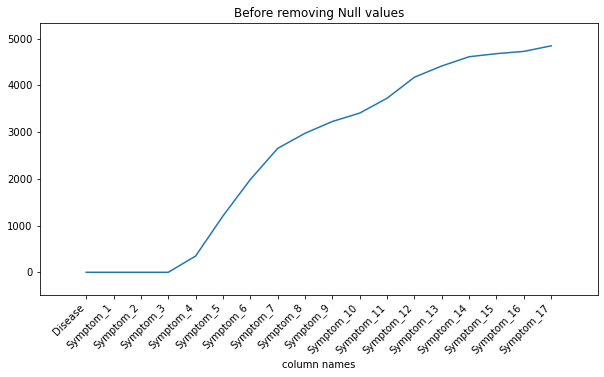

In [4]:
null_checker = main_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [5]:
cols = main_data.columns
data = main_data[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(main_data.shape)

main_data = pd.DataFrame(s, columns=main_data.columns)


In [6]:
main_data = main_data.fillna(0)


In [7]:
data2 = pd.read_csv('Symptom-severity.csv')
data2['Symptom'] = data2['Symptom'].str.replace('_',' ')


In [8]:
vals = main_data.values
symptoms = data2['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = data2[data2['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)


In [9]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
main_data = d.replace('foul smell of urine',0)


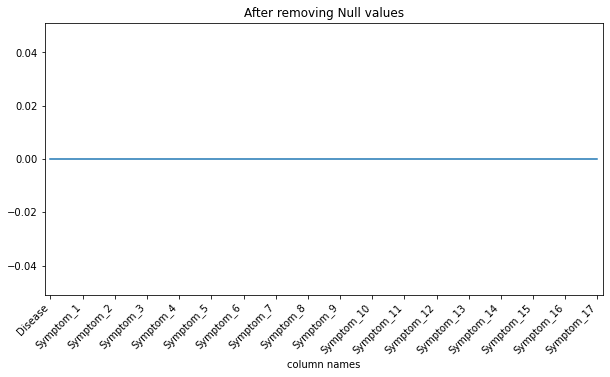

In [10]:
null_checker = main_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [11]:
print("Number of symptoms used to identify the disease ",len(data2['Symptom'].unique()))
print("Number of diseases that can be identified ",len(main_data['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [12]:
data = main_data.iloc[:,1:].values
labels = main_data['Disease'].values



In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.7,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3444, 17) (1476, 17) (3444,) (1476,)


In [14]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

df_cm = pd.DataFrame(conf_mat, index= main_data['Disease'].unique(), columns= main_data['Disease'].unique())

F1-score% = 94.93170884818655 | Accuracy% = 94.78319783197831


In [15]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.617%, Standard Deviation: (1.57%)


In [16]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 97.629%, Standard Deviation: (0.81%)


In [17]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=main_data['Disease'].unique(), columns=main_data['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

F1-score% = 99.57591080576252 | Accuracy% = 99.59349593495935


In [18]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.216%, Standard Deviation: (0.57%)


In [19]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 99.458%, Standard Deviation: (0.51%)


In [20]:
discrp = pd.read_csv("symptom_Description.csv")
precaution = pd.read_csv("symptom_precaution.csv")

In [24]:
n_groups = 2
algorithms = ('Decision Tree', 'Random Forest')
train_accuracy = (DS_train.mean()*100.0,rnd_forest_train.mean()*100.0,)
test_accuracy = (DS_test.mean()*100.0,rnd_forest_test.mean()*100.0)
Standard_Deviation=(DS_test.std()*100.0,rnd_forest_test.std()*100.0)


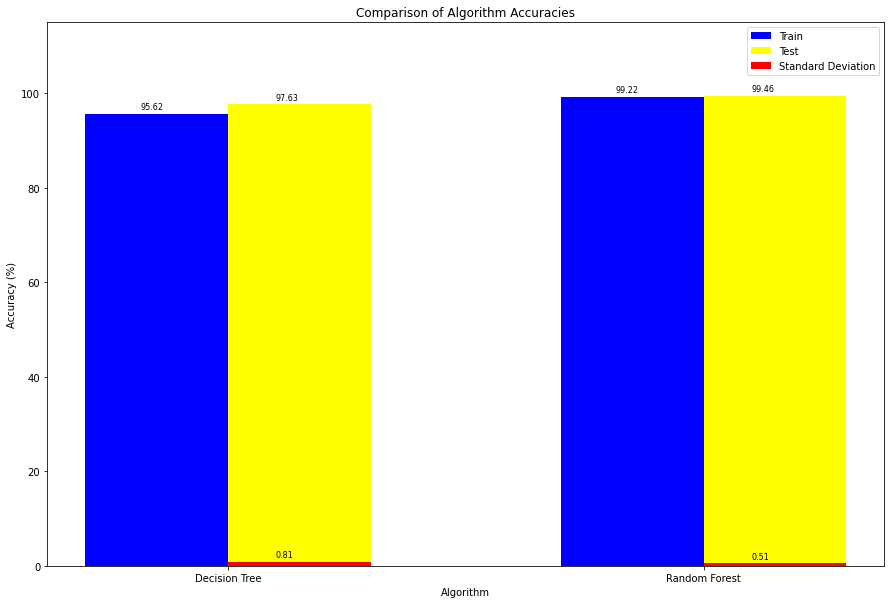

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Blue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Yellow', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') 
plt.ylabel('Accuracy (%)') 
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies')
plt.xticks(index + bar_width * 0.5, algorithms) 
plt.legend(loc = 'upper right') 
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
     plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))  
plt.show()     

In [26]:
def predd(x,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(data2["Symptom"])
    b = np.array(data2["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = precaution[precaution['Disease']==pred2[0]]
    c=np.where(precaution['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(precaution.iloc[c])):
          precuation_list.append(precaution.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)       

In [28]:
sympList=data2["Symptom"].to_list()
print(sympList)

['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowe

In [36]:

predd(rnd_forest,'irritability','depression','lack of concentration',0,0,0,0,0,0,0,0,0,0,0,0,0,0)

The Disease Name:  Acne
The Disease Discription:  Acne vulgaris is the formation of comedones, papules, pustules, nodules, and/or cysts as a result of obstruction and inflammation of pilosebaceous units (hair follicles and their accompanying sebaceous gland). Acne develops on the face and upper trunk. It most often affects adolescents.
Recommended Things to do at home: 
bath twice
avoid fatty spicy food
drink plenty of water
avoid too many products
